### **Implement LSH**

### Group members : 
##### 1. Mintra Sojiphan 6220422057 DS6
##### 2. Kavin Singhakhet 6310422040 DS7
##### 3. Porawoot Buranadilok 6220422064 DS6

#### **We implement LSH using two packages with two differnt datasets**
##### 1. Package: SnaPy // Datasets: A Corpus of Plagiarised Short Answers 
#####    References: https://github.com/justinnbt/SnaPy 
#####                https://ir.shef.ac.uk/cloughie/resources/plagiarism_corpus.html

##### 2. Package: datasketch // Dataset: News headlines
#####    References: http://ekzhu.com/datasketch/lshforest.html


#### **1. Package: SnaPy // Datasets: A Corpus of Plagiarised Short Answers**
##### We will implement LSH on plagiarised answers of five different questions namely question A, B, C, D, and E to identify near duplicate answers of each question using Jaccard similarity threshold (s) = 0.5



#### Step 1: Install and import packages



In [ ]:
pip install snapy

In [ ]:
pip install mmh3

  Created wheel for mmh3: filename=mmh3-2.5.1-cp36-cp36m-linux_x86_64.whl size=37849 sha256=3f28dc26ac98dc67078e2b1835f83f8d0ceb68783fbb8283be366793d5b16299
  Stored in directory: /root/.cache/pip/wheels/38/b4/ea/6e4e321c625d3320c0c496bf4088371546d8fce5f1dd71b219
Successfully built mmh3


In [ ]:
from snapy import MinHash, LSH
from google.colab import drive
import matplotlib.pyplot as plt
import networkx as nx

####Step 2: Connect Google Colab with Google drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


#### Step 3: Create function to perform LSH

In [ ]:
 def LSH_task(task):

  #import data 
  files=[]
  x='/content/drive/MyDrive/corpus/'+task+'.txt'
  files.append(x)
  for i in range(1,20):
    z='/content/drive/MyDrive/corpus/'+task+ ' ('+str(i)+').txt'
    files.append(z)

  docs=[]
  for file in files:
    file = open(file)
    text = file.read()
    docs.append(text)
  file.close()

  print(docs)
  print()
  print('#task: ',len(docs))
  labels=[]
  labels.append(task)
  for i in range(1,20):
    a=task+'('+str(i)+')'
    labels.append(a)

  seed =3

  #Create MinHash object.
  minhash = MinHash(docs, n_gram=9, permutations=100, hash_bits=64, seed=3)
  print('Signatures metric: ',len(minhash.signatures),'x',len(minhash.signatures[0]))
  print('#permutations used to create signatures:',minhash.permutations)
  #print('Minhash Signatures for each text:')
  #for i in minhash.signatures:
    #print(i)
  
  # Create LSH model.
  lsh = LSH(minhash, labels, no_of_bands=50)

  # Query to find near duplicates for each doc.
 # print()
  #for i in labels:
    #print('Near duplicate for answer',i,':',lsh.query(i, min_jaccard=0.1))

  # Check contents of documents.
  #print(lsh.contains())

  # Return adjacency list for all similar texts.
  adjacency_list = lsh.adjacency_list(min_jaccard=0.1)
  #print()
  #print('adjacency_lists: ',adjacency_list)
  #print()
  # Returns edge list for use creating a weighted graph.
  edge_list = lsh.edge_list(min_jaccard=0.1, jaccard_weighted=True)
  #print('edge lists: ',edge_list)
  #print()

  # Create Undirected weighted graph.
  fig=plt.figure(figsize =(10,6))
  fig.set_facecolor("#181818")
  title="Near duplicate answer of question "+task
  fig.suptitle(title,color= '#cccccc',fontsize=18)
  G = nx.Graph()
  for i in edge_list:
    G.add_edge(i[0],i[1],weight=i[2])
  e1=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > 0.5]
  e2=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <= 0.5]
  pos=nx.spring_layout(G) 

  # nodes
  nx.draw_networkx_nodes(G,pos,node_size=900,node_color='yellow')

  # edges
  edge1=nx.draw_networkx_edges(G,pos,edgelist=e1,width=4,edge_color='red')
  edge2=nx.draw_networkx_edges(G,pos,edgelist=e2,width=1,edge_color='red',style='dashed')

  # labels
  nx.draw_networkx_labels(G,pos,font_family='sans-serif',font_size=10,font_color='#000000',font_weight=150)
  keys=[(i[0],i[1]) for i in edge_list]
  values= [(i[2]) for i in edge_list]
  edge_labels = dict(zip(keys, values))
  nx.draw_networkx_edge_labels(G,pos,edge_labels= edge_labels,font_color='red')                          
  fig.set_facecolor("#181818")
  plt.axis('off')
  fig.legend((edge1, edge2), ('sim(i,j) > 0.5', 'sim(i,j) <= 0.5'),loc=1,fontsize=12)
  plt.savefig("LSH_graph.png")
  plt.show()

#### Step 4: Perform LSH on set of 20 plagiarised answers of the following questions to identify near duplicate answers using Jaccard similarity threshold (s) = 0.5



#### **Question A**: The result illustrates that there are 3 pairs of answers which can be identified as near duplicate answers as shown below:
#### 1. Answer A(1) and A(18) with Jaccard similarity of 0.9
#### 2. Answer A(1) and A(6) with Jaccard similarity of 0.74
#### 3. Answer A(6) and A(18) with Jaccard similarity of 0.7

['Object oriented programming is a  style of programming that supports encapsulation, inheritance, and polymorphism. Inheritance means derived  a new class from the base class.  We can also say there are parents class and child classes in inheritance.  Inheritance was firstly derived in 1967.\nThe child class has all the features of parents class or we can say the base class more over it may also include some additional features.  Inheritance is used for modification and implementation new features in computer programming language.It is possible that child class has all the attributes of parents class but it is not possible that all the attributes of child class must have in base class or parent class.\nI categorization in computer language also inheritance is a useful tool.categorization define as a powerful  feature.it  has been also used in generalisation and in human learning. In some areas less information need to be stored.\nGenerlisation also some time known as inheritance. The 

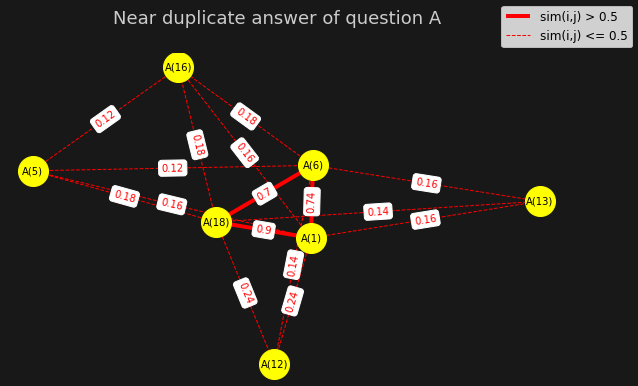

In [ ]:
LSH_task('A')

#### **Question B**: The result illustrates that there are no pairs of answers which can be identified as near duplicate answers

['PageRank is a link analysis algorithm used by the Google Internet search engine that assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set. The algorithm may be applied to any collection of entities with reciprocal quotations and references. The numerical weight that it assigns to any given element E is also called the PageRank of E and denoted by PR(E).\nThe name "PageRank" is a trademark of Google, and the PageRank process has been patented (U.S. Patent 6,285,999 ). However, the patent is assigned to Stanford University and not to Google. Google has exclusive license rights on the patent from Stanford University. The university received 1.8 million shares in Google in exchange for use of the patent; the shares were sold in 2005 for $336 million.\nGoogle describes PageRank:\n“ \tPageRank relies on the uniquely democratic nature of the web by using its vast li

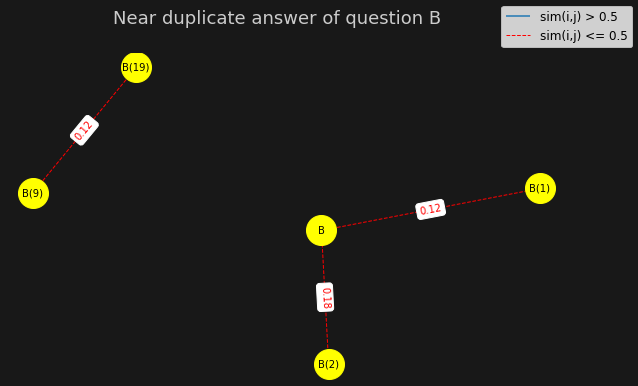

In [ ]:
LSH_task('B')

#### **Question C**: The result illustrates that there are no pairs of answers which can be identified as near duplicate answers

['Vector space model (or term vector model) is an algebraic model for representing text documents (and any objects, in general) as vectors of identifiers, such as, for example, index terms. It is used in information filtering, information retrieval, indexing and relevancy rankings. Its first use was in the SMART Information Retrieval System.\nA document is represented as a vector. Each dimension corresponds to a separate term. If a term occurs in the document, its value in the vector is non-zero. Several different ways of computing these values, also known as (term) weights, have been developed. One of the best known schemes is tf-idf weighting (see the example below).\nThe definition of term depends on the application. Typically terms are single words, keywords, or longer phrases. If the words are chosen to be the terms, the dimensionality of the vector is the number of words in the vocabulary (the number of distinct words occurring in the corpus).\nThe vector space model has the foll

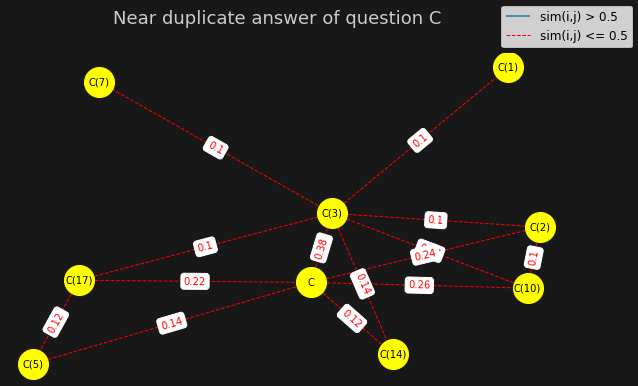

In [ ]:
LSH_task('C')

#### **Question D**:The result illustrates that there are 3 pairs of answers which can be identified as near duplicate answers as shown below:
#### 1. Answer D and D(14) with Jaccard similarity of 0.7
#### 2. Answer D and D(18) with Jaccard similarity of 0.68
#### 3. Answer D(18) and A(14) with Jaccard similarity of 0.62

['In probability theory, Bayes\' theorem (often called Bayes\' law after Rev Thomas Bayes) relates the conditional and marginal probabilities of two random events. It is often used to compute posterior probabilities given observations. For example, a patient may be observed to have certain symptoms. Bayes\' theorem can be used to compute the probability that a proposed diagnosis is correct, given that observation. (See example 2)\nAs a formal theorem, Bayes\' theorem is valid in all common interpretations of probability. However, it plays a central role in the debate around the foundations of statistics: frequentist and Bayesian interpretations disagree about the ways in which probabilities should be assigned in applications. Frequentists assign probabilities to random events according to their frequencies of occurrence or to subsets of populations as proportions of the whole, while Bayesians describe probabilities in terms of beliefs and degrees of uncertainty. The articles on Bayesia

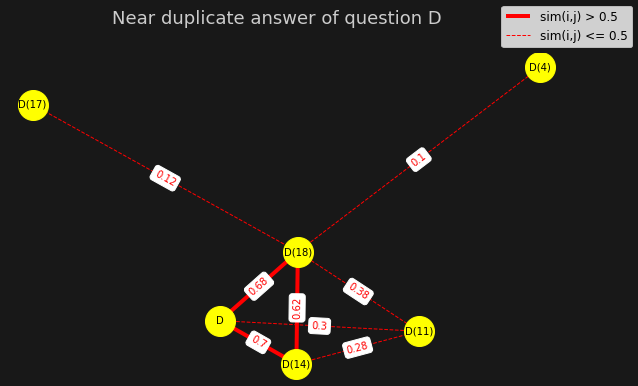

In [ ]:
LSH_task('D')

#### **Question E**: The result illustrates that there are no pairs of answers which can be identified as near duplicate answers

['In mathematics and computer science, dynamic programming is a method of solving problems that exhibit the properties of overlapping subproblems and optimal substructure (described below). The method takes much less time than naive methods.\nThe term was originally used in the 1940s by Richard Bellman to describe the process of solving problems where one needs to find the best decisions one after another. By 1953, he had refined this to the modern meaning. The field was founded as a systems analysis and engineering topic that is recognized by the IEEE. Bellman\'s contribution is remembered in the name of the Bellman equation, a central result of dynamic programming which restates an optimization problem in recursive form.\nThe word "programming" in "dynamic programming" has no particular connection to computer programming at all, and instead comes from the term "mathematical programming", a synonym for optimization. Thus, the "program" is the optimal plan for action that is produced. 

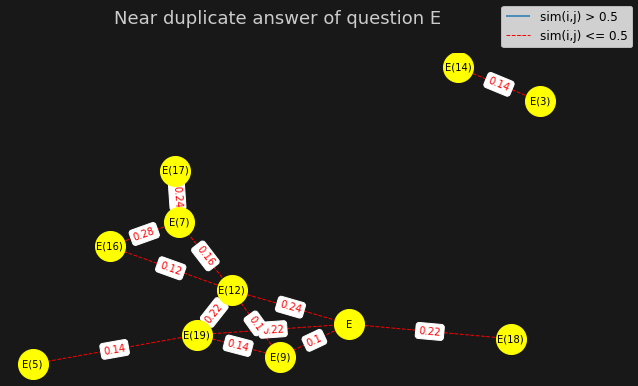

In [ ]:
LSH_task('E')

#### **2. Package: datasketch // Dataset: News headlines**
#### We will implement MinHash LSH Forest,which takes a MinHash data sketch of the query set, and returns the top-k matching sets that have the approximately highest Jaccard similarities with the query set,  to create news headlines recommendation 

#### Step 1: Install and Import packages

In [ ]:
pip install datasketch

In [ ]:
import numpy as np
import pandas as pd
import re
import time
from datasketch import MinHash, MinHashLSHForest

#### Step 2: Acquire data using web scraping package (BeautifulSoup)

In [ ]:
from bs4 import BeautifulSoup
import requests

url1 = 'https://www.reuters.com/news/archive/technologynews?view=page&page=1&pageSize=10'
url2 = 'https://www.reuters.com/news/archive/technologynews?view=page&page=2&pageSize=10'
url3 = 'https://www.reuters.com/news/archive/technologynews?view=page&page=3&pageSize=10'
url4 = 'https://www.reuters.com/news/archive/technologynews?view=page&page=4&pageSize=10'
url5 = 'https://www.reuters.com/news/archive/technologynews?view=page&page=5&pageSize=10'

def web_scraping_news(url):
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html,'lxml')
    div_tag = soup.find_all('h3',attrs={'class':"story-title"})
    news = [i for i in div_tag]

    return news

In [ ]:
news1 = web_scraping_news(url1)
news2 = web_scraping_news(url2)
news3 = web_scraping_news(url3)
news4 = web_scraping_news(url4)
news5 = web_scraping_news(url5)
news = news1 + news2 + news3 + news4 + news5
titles = [str(i) for i in news]

#Extract News Headline
headlines = [a.strip(''''<h3 class="story-title">
								''').rstrip('</') for a in titles]

for headline in headlines:
    print(headline)

U.S. thanks Taiwan for support for auto chips in key trade meeting
Robinhood lifts trading restrictions on all stocks, including GameStop
PayPal says to shut domestic payments business in India
Shares of Tencent-backed Kuaishou triple in HK debut as retail frenzy continues
Australian drone firm reshapes strategy over Google pull-out threat
Facebook faces a reckoning in Myanmar after blocked by military
GameStop, 'Reddit rally' stocks slide more, Yellen vows scrutiny
Yellen seeks to 'understand deeply' GameStop frenzy as market regulators meet
In GameStop saga, U.S. regulator examining all aspects and parties: sources
Samsung considers Austin for $17 billion chip plant, eyes tax breaks of at least $806 million: documents
Biden calls for expanded efforts to protect LGBTQ rights globally
Biden set to accept more refugees after years of Trump restrictions
U.S. House punishes Republican congresswoman over incendiary remarks
Amazon bucks UK's grim labour market with 1,000 apprenticeships
Loo

#### Step 3: Create functions to perform news headlines recommendations

In [ ]:
def preprocess(text, char_ngram=5):
    
    return set(text[head:head + char_ngram] for head in range(0, len(text) - char_ngram))

def get_forest(data, perms):
    start_time = time.time()
    
    minhash = []
    
    for text in data['title']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=perms)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))
    
    return forest

def predict(text, data, perms, num_results, forest):
    start_time = time.time()
    
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    
    result = data.iloc[idx_array]['title']
    
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    
    return result

In [ ]:
data = pd.DataFrame(headlines,columns= ['title'])
data.head()

,title
0,U.S. thanks Taiwan for support for auto chips ...
1,Robinhood lifts trading restrictions on all st...
2,PayPal says to shut domestic payments business...
3,Shares of Tencent-backed Kuaishou triple in HK...
4,Australian drone firm reshapes strategy over G...


In [ ]:
forest = get_forest(data, 100)

It took 0.1442406177520752 seconds to build forest.


#### Step 4: Predict news headlines recommendations for the given title.


In [ ]:
title = "Stocks explained: What's going on with GameStop?"
result = predict(title, data, 100, 10, forest)
print('\n Top Recommendation(s) is(are) \n', result)

It took 0.007291078567504883 seconds to query forest.

 Top Recommendation(s) is(are) 
 1     Robinhood lifts trading restrictions on all st...
11    Wisconsin governor clashes with lawmakers over...
Name: title, dtype: object


In [ ]:
title = "What is this?"
result = predict(title, data, 100, 10, forest)
print('\n Top Recommendation(s) is(are) \n', result)


 Top Recommendation(s) is(are) 
 None
